In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob
plt.style.use("ggplot")
%matplotlib inline

Using TensorFlow backend.


In [2]:
# re-size all the images to this
IMAGE_SIZE = [150, 150]

train_path = r'C:\Users\Md Moradul Siddique\Documents\data\Money data\training'
valid_path = r'C:\Users\Md Moradul Siddique\Documents\data\Money data\validation'

In [ ]:
train_path.classes

In [3]:

one_hundered_dir = os.path.join(r'C:\Users\Md Moradul Siddique\Documents\data\Money data\training\100')
fifty_dir = os.path.join(r'C:\Users\Md Moradul Siddique\Documents\data\Money data\training\50')
twenty_dir = os.path.join(r'C:\Users\Md Moradul Siddique\Documents\data\Money data\training\20')
ten_dir = os.path.join(r'C:\Users\Md Moradul Siddique\Documents\data\Money data\training\10')

In [4]:

one_hundered_names = os.listdir(one_hundered_dir)
fifty_names = os.listdir(fifty_dir)
twenty_names = os.listdir(twenty_dir)
ten_names = os.listdir(ten_dir)


print(one_hundered_names[:10])
print(fifty_names[:10])
print(twenty_names[:10])
print(ten_names[:10])

['100_0.jpg', '100_1.jpg', '100_10.jpg', '100_100.jpg', '100_101.jpg', '100_102.jpg', '100_103.jpg', '100_104.jpg', '100_105.jpg', '100_106.jpg']
['50_0.jpg', '50_1.jpg', '50_10.jpg', '50_100.jpg', '50_101.jpg', '50_102.jpg', '50_103.jpg', '50_104.jpg', '50_105.jpg', '50_106.jpg']
['20_0.jpg', '20_1.jpg', '20_10.jpg', '20_100.jpg', '20_101.jpg', '20_102.jpg', '20_103.jpg', '20_104.jpg', '20_105.jpg', '20_106.jpg']
['10_0.jpg', '10_1.jpg', '10_10.jpg', '10_100.jpg', '10_101.jpg', '10_102.jpg', '10_103.jpg', '10_104.jpg', '10_105.jpg', '10_106.jpg']


In [5]:
print(f"total training of 1Hundered Notes: {len(one_hundered_names)}")
print(f"total training of 50Notes : {len(fifty_names)}")
print(f"total training of 20Notes : {len(twenty_names)}")
print(f"total training of 10Notes : {len(ten_names)}")

total training of 1Hundered Notes: 209
total training of 50Notes : 214
total training of 20Notes : 174
total training of 10Notes : 214


In [6]:
# parameters for graph we'll output images in a 4x4
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

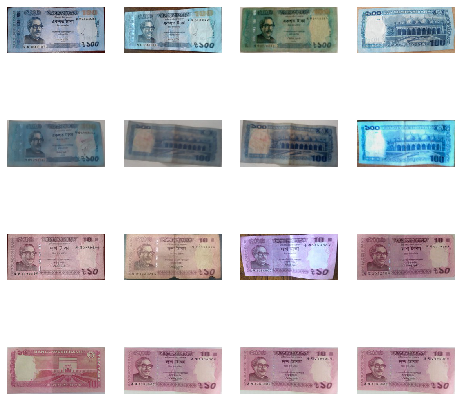

In [7]:
# set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)

pic_index += 8

one_hundered_pix = [os.path.join(one_hundered_dir, fname) 
                for fname in one_hundered_names[pic_index-8:pic_index]]

ten_pix = [os.path.join(ten_dir, fname) 
                for fname in ten_names[pic_index-8:pic_index]]


for i, img in enumerate(one_hundered_pix + ten_pix):
    sub_plot = plt.subplot(nrows, ncols, i + 1)
    sub_plot.axis("Off")
    img_read = mpimg.imread(img)
    plt.imshow(img_read)
    
plt.show()

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(9, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)       

In [14]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size=32,
                                                   target_size=(150, 150),
                                                   class_mode="categorical")

validation_generator = validation_datagen.flow_from_directory(valid_path,
                                                             batch_size=32,
                                                              target_size=(150, 150),
                                                             class_mode="categorical")

Found 1637 images belonging to 9 classes.
Found 456 images belonging to 9 classes.


In [17]:


# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=20,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

Epoch 1/20
52/52 [==============================] - 40s 742ms/step - loss: 2.1471 - accuracy: 0.1638 - val_loss: 1.9239 - val_accuracy: 0.2873
Epoch 2/20
52/52 [==============================] - 39s 740ms/step - loss: 1.6446 - accuracy: 0.4350 - val_loss: 1.2560 - val_accuracy: 0.6184
Epoch 3/20
52/52 [==============================] - 39s 739ms/step - loss: 1.0131 - accuracy: 0.6936 - val_loss: 0.8244 - val_accuracy: 0.7171
Epoch 4/20
52/52 [==============================] - 40s 766ms/step - loss: 1.0495 - accuracy: 0.7137 - val_loss: 0.6011 - val_accuracy: 0.8202
Epoch 5/20
52/52 [==============================] - 40s 762ms/step - loss: 0.5424 - accuracy: 0.8317 - val_loss: 0.3042 - val_accuracy: 0.9013
Epoch 6/20
52/52 [==============================] - 40s 761ms/step - loss: 0.4034 - accuracy: 0.8820 - val_loss: 0.3429 - val_accuracy: 0.8860
Epoch 7/20
52/52 [==============================] - 39s 748ms/step - loss: 0.3906 - accuracy: 0.8764 - val_loss: 0.5025 - val_accuracy: 0.8399

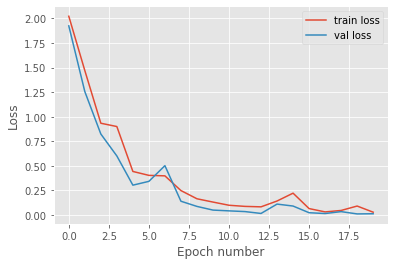

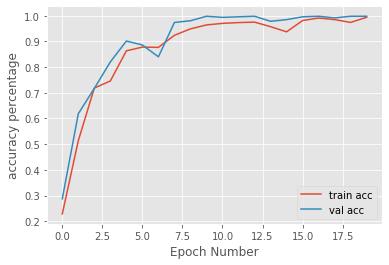

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("Epoch number")
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch Number')
plt.ylabel('accuracy percentage')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Five Thousand Taka


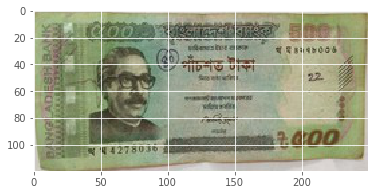

In [43]:
path = r"C:\Users\Md Moradul Siddique\Documents\data\Money data\testing1\500_32.jpg"
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)



if classes[0] == 0:
    print("One Taka")
elif classes[0] == 1:
    print("Ten Taka")
elif classes[0] == 2:
    print("One Hundred Taka")
elif classes[0] == 3:
    print("One Thousand Taka")
elif classes[0] == 4:
    print("Two Taka")
elif classes[0] == 5:
    print("Tweenty Taka")
elif classes[0] == 6:
    print("Five Taka")
elif classes[0] == 7:
    print("Fifty Taka")
elif classes[0] == 8:
    print("Five Thousand Taka")

    
img = mpimg.imread(path)
plt.imshow(img)
plt.show()

In [45]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model.save('bd_money_recognition_CNN.h5')

In [47]:
model=load_model('bd_money_recognition_CNN.h5')

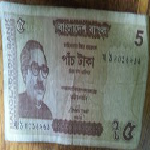

In [49]:
img=image.load_img(r"C:\Users\Md Moradul Siddique\Documents\data\Money data\testing\5\5_27.jpg",target_size=(150, 150))
img

In [50]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [53]:
result = model.predict(test_image)
result

array([[0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [54]:
if result[0][] == 6:
    print("Five Taka")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()